In [1]:
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly
#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
#Data processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [2]:
train_data=pd.read_csv('Training Data.csv')
train_data["married"] = le.fit_transform(train_data["married"])
train_data["house_ownership"] = le.fit_transform(train_data["house_ownership"])
train_data["car_ownership"] = le.fit_transform(train_data["car_ownership"])
train_data["profession"] = le.fit_transform(train_data["profession"])
train_data["city"] = le.fit_transform(train_data["city"])
train_data["state"] = le.fit_transform(train_data["state"])
train_data

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,251997,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,251998,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,251999,6507128,45,0,1,2,0,27,233,18,0,10,0


In [3]:
p=train_data[train_data['risk_flag']==1][:20000]
q=train_data[train_data['risk_flag']==0][:20000]
test_data=pd.concat([p,q])
test_data=test_data.sort_values(by='Id').copy()

In [4]:
train_data.columns

Index(['Id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [5]:
X_train=train_data[['income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years']]
y_train=train_data['risk_flag']
X_test=test_data[['income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years']]
y_test=test_data['risk_flag']

In [6]:
x=y_train[y_train==1][:100000]
x.count()

30996

In [21]:
Model9 = RandomForestClassifier(n_estimators=1000,random_state=10,n_jobs=1000,max_depth=100,bootstrap=True)
Model9.fit(X_train[:150000],y_train[:150000])
y_pred = Model9.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))
y_pred=Model9.predict_proba(X_test)
roc=roc_auc_score(y_test,y_pred[:,1])
print("roc_auc -350-" ,roc)

              precision    recall  f1-score   support

           0       0.97      0.83      0.90     23402
           1       0.80      0.97      0.88     16598

    accuracy                           0.89     40000
   macro avg       0.89      0.90      0.89     40000
weighted avg       0.90      0.89      0.89     40000

RandomForestClassifier:> 0.8897
roc_auc -350- 0.9884056999999999


In [28]:
output=pd.read_csv('Test Data.csv')
output["married"] = le.fit_transform(output["married"])
output["house_ownership"] = le.fit_transform(output["house_ownership"])
output["car_ownership"] = le.fit_transform(output["car_ownership"])
output["profession"] = le.fit_transform(output["profession"])
output["city"] = le.fit_transform(output["city"])
output["state"] = le.fit_transform(output["state"])
output


,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,1,2,0,26,181,28,4,13
1,2,1215004,25,5,1,2,0,24,131,14,5,10
2,3,8901342,50,12,1,2,0,30,290,14,9,14
3,4,1944421,49,9,0,2,1,1,171,14,3,12
4,5,13429,25,18,1,2,1,12,39,28,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,1,2,0,44,90,0,5,10
27996,27997,2917765,47,9,1,2,0,47,249,13,9,14
27997,27998,8082415,24,5,1,2,0,30,190,14,4,13
27998,27999,9474180,51,13,1,2,1,7,47,4,13,14


In [15]:
y_pred=Model9.predict_proba(X_test)

In [20]:
roc=roc_auc_score(y_test,y_pred[:,1])
print("roc_auc -350-" ,roc)

roc_auc -350- 0.9884118475


In [29]:
output['risk_flag']=Model9.predict(output[['income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years']])

In [31]:
output['risk_flag_prob']=Model9.predict_proba(output[['income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years']])[:,1]

In [32]:
output.to_csv('output.csv')

In [35]:
output

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,risk_flag_prob
0,1,7393090,59,19,1,2,0,26,181,28,4,13,0,0.000000
1,2,1215004,25,5,1,2,0,24,131,14,5,10,0,0.000000
2,3,8901342,50,12,1,2,0,30,290,14,9,14,0,0.000000
3,4,1944421,49,9,0,2,1,1,171,14,3,12,0,0.128233
4,5,13429,25,18,1,2,1,12,39,28,13,11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,1,2,0,44,90,0,5,10,0,0.000000
27996,27997,2917765,47,9,1,2,0,47,249,13,9,14,0,0.000000
27997,27998,8082415,24,5,1,2,0,30,190,14,4,13,0,0.000000
27998,27999,9474180,51,13,1,2,1,7,47,4,13,14,0,0.111467


In [24]:
from sklearn.metrics import plot_roc_curve
from matplotlib import pyplot as plt

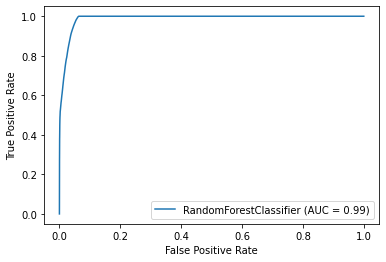

In [25]:
curve=plot_roc_curve(Model9,X_test,y_test)
plt.show()